In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
fish = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

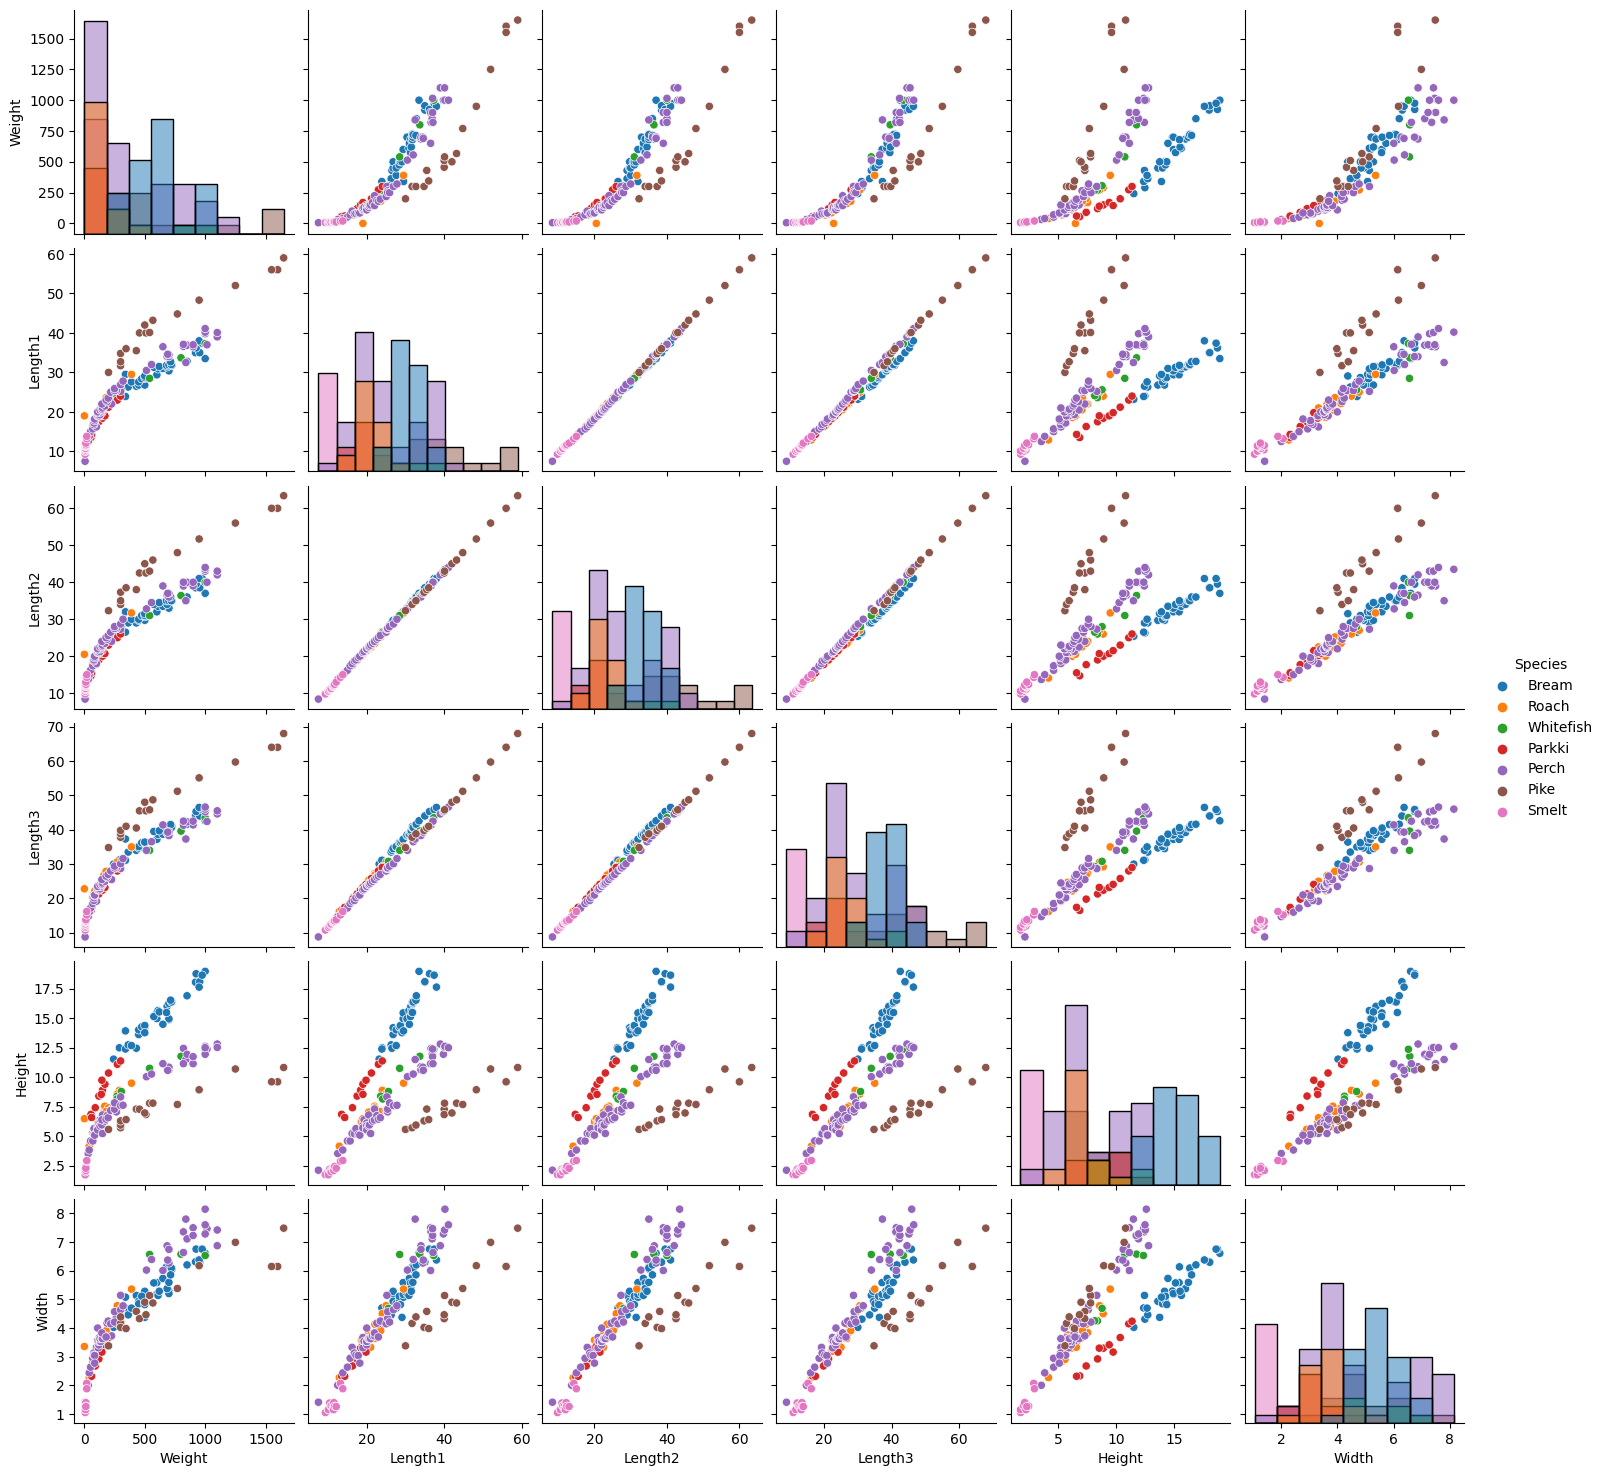

In [23]:
sns.pairplot(fish, hue='Species', diag_kind='hist')

In [24]:
dummies = pd.get_dummies(fish['Species'])
data = pd.concat([fish, dummies], axis=1)
data.drop('Species', axis=1, inplace=True)

In [25]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [26]:
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']]
X.head()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [27]:
y = data['Weight']
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression().fit(X_train, y_train)

In [39]:
reg.score(X_test, y_test)

0.9405192628555377

In [34]:
preds = reg.predict(X_test)
preds

array([ 2.52413687e+01,  5.95421494e-01,  2.08449859e+02,  3.31665261e+02,
        2.15482994e+02,  7.53929942e+02, -7.24585071e+01,  2.53698723e+02,
        2.59678480e+02,  1.18648573e+03,  6.00206027e+02,  8.47635320e+02,
        5.37239650e+02,  1.52193053e+02,  6.78093881e+02,  8.17925786e+02,
        1.02085423e+03,  2.81460586e+02,  2.21230474e+02,  5.80928938e+02,
       -2.65982999e+01,  5.79658685e+02,  5.06143757e+02,  4.79971143e+02,
        8.14231017e+02,  9.65625735e+02,  2.18708642e+02,  3.55983349e+02,
       -1.02621031e+02, -2.80999101e+01,  5.98136370e+02, -1.80105070e+01,
       -1.04683495e+02,  7.28061602e+02,  3.58027459e+02,  1.63308996e+02,
        1.88699604e+02,  1.09828388e+02,  2.04508008e+02,  7.80041169e+02,
        6.78083828e+02,  7.28191073e+02, -7.67869255e+01,  1.79681138e+02,
        1.92874650e+02,  6.19181650e+00,  1.35603189e+02,  6.51314578e+02,
        1.35643024e+02,  7.02557771e+01,  7.20492577e+02,  4.85662042e+02,
        5.38647607e+02])

In [35]:
spejimas = pd.Series(data=preds, name='Spejamas svoris')
spejimas.head()

0     25.241369
1      0.595421
2    208.449859
3    331.665261
4    215.482994
Name: Spejamas svoris, dtype: float64

In [36]:
y_test.head()

78      78.0
155     13.4
128    200.0
55     270.0
94     150.0
Name: Weight, dtype: float64

In [37]:
rezultatas = pd.concat([y_test.reset_index(), spejimas], axis=1)[['Weight', 'Spejamas svoris']]

In [38]:
rezultatas

,Weight,Spejamas svoris
0,78.0,25.241369
1,13.4,0.595421
2,200.0,208.449859
3,270.0,331.665261
4,150.0,215.482994
5,1000.0,753.929942
6,7.0,-72.458507
7,180.0,253.698723
8,188.0,259.678480
9,1250.0,1186.485729
